# EXPERIMENT 3: Different architecture

In [1]:
import torch 
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.ops import nms
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import matplotlib.pyplot as plt
from dataset import AfricanWildlifeDataset
from loss import YoloLoss
from YOLOv1 import YOLO
from train2 import train2
from test import test
from utils import plot_bbox, get_boxes
import time
from dataset2 import AfricanWildlifeDataset2
def convert_dict(d, with_score=True):
    boxes_by_img = []
    for key, val in d.items():
        l = {}
        l['boxes'] = torch.tensor([x[2:] for x in val])
        if with_score:
            l['scores'] = torch.tensor([x[1] for x in val])
        l['labels'] = torch.tensor([int(x[0]) for x in val])
        boxes_by_img.append(l)
    return boxes_by_img

In [2]:
LEARNING_RATE = 2e-5
DEVICE = "cuda" if torch.cuda.is_available else "cpu"
torch.device('cuda')
TRAIN_BATCH_SIZE = 20
TEST_BATCH_SIZE = 5
EPOCHS = 60
TRAIN_DIR = 'African_Wildlife/train'
TEST_DIR = 'African_Wildlife/test'
LABEL_DIR = 'African_Wildlife/annotations'
S, B, C = 7, 2, 4

# 1. Darknet19

In [3]:
# load the data
transform = transforms.Compose([transforms.Resize((448, 448)), transforms.ToTensor(), transforms.Normalize([0.5200, 0.4957, 0.4068],[0.2391, 0.2283, 0.2303])])

train_set = AfricanWildlifeDataset2(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, transform=transform)
train_loader = DataLoader(dataset = train_set, batch_size = TRAIN_BATCH_SIZE, shuffle = True)

test_set = AfricanWildlifeDataset2(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, istesting=True, transform=transform)
test_loader = DataLoader(dataset=test_set, batch_size=TEST_BATCH_SIZE, shuffle= False)

In [4]:
# model
model_1 = YOLO(input_channels=3, S=S, B=B, C=C, arch="darknet19").to(DEVICE)
optimizer = optim.Adam(model_1.parameters(), lr=LEARNING_RATE)
criterion = YoloLoss(S=S, B=B, C=C)

In [5]:
start_time = time.time()
loss_hist = train2(train_loader, model_1, optimizer, criterion, EPOCHS, DEVICE, 
                  ckpt_filename='experiment_3/darknet19_2.tar', load_model=False, 
                  save_epochs=5)
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 

100%|██████████| 60/60 [00:31<00:00,  1.93it/s, loss=0.0853]


 EPOCH 1:  Train loss 0.086


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.0679]


 EPOCH 2:  Train loss 0.050


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.0482]


 EPOCH 3:  Train loss 0.040


100%|██████████| 60/60 [00:28<00:00,  2.07it/s, loss=0.0296]


 EPOCH 4:  Train loss 0.033


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.0219]


 EPOCH 5:  Train loss 0.027
-> Saving checkpoint


100%|██████████| 60/60 [00:29<00:00,  2.07it/s, loss=0.0217]


 EPOCH 6:  Train loss 0.022


100%|██████████| 60/60 [00:28<00:00,  2.07it/s, loss=0.0193]


 EPOCH 7:  Train loss 0.019


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.0148]


 EPOCH 8:  Train loss 0.016


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.0118] 


 EPOCH 9:  Train loss 0.013


100%|██████████| 60/60 [00:29<00:00,  2.07it/s, loss=0.00855]


 EPOCH 10:  Train loss 0.012
-> Saving checkpoint


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.0101] 


 EPOCH 11:  Train loss 0.011


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.0112] 


 EPOCH 12:  Train loss 0.010


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00753]


 EPOCH 13:  Train loss 0.009


100%|██████████| 60/60 [00:28<00:00,  2.08it/s, loss=0.00759]


 EPOCH 14:  Train loss 0.009


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00925]


 EPOCH 15:  Train loss 0.009
-> Saving checkpoint


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00793]


 EPOCH 16:  Train loss 0.009


100%|██████████| 60/60 [00:29<00:00,  2.07it/s, loss=0.00761]


 EPOCH 17:  Train loss 0.008


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00608]


 EPOCH 18:  Train loss 0.008


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00879]


 EPOCH 19:  Train loss 0.008


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.0064] 


 EPOCH 20:  Train loss 0.007
-> Saving checkpoint


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00538]


 EPOCH 21:  Train loss 0.008


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00622]


 EPOCH 22:  Train loss 0.007


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.0054] 


 EPOCH 23:  Train loss 0.007


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00975]


 EPOCH 24:  Train loss 0.007


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00643]


 EPOCH 25:  Train loss 0.006
-> Saving checkpoint


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00671]


 EPOCH 26:  Train loss 0.006


100%|██████████| 60/60 [00:28<00:00,  2.07it/s, loss=0.00541]


 EPOCH 27:  Train loss 0.006


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00532]


 EPOCH 28:  Train loss 0.006


100%|██████████| 60/60 [00:28<00:00,  2.08it/s, loss=0.00753]


 EPOCH 29:  Train loss 0.007


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00758]


 EPOCH 30:  Train loss 0.007
-> Saving checkpoint


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00546]


 EPOCH 31:  Train loss 0.006


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00422]


 EPOCH 32:  Train loss 0.006


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00449]


 EPOCH 33:  Train loss 0.005


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.0042] 


 EPOCH 34:  Train loss 0.005


100%|██████████| 60/60 [00:28<00:00,  2.07it/s, loss=0.00537]


 EPOCH 35:  Train loss 0.005
-> Saving checkpoint


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00346]


 EPOCH 36:  Train loss 0.005


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00373]


 EPOCH 37:  Train loss 0.004


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00514]


 EPOCH 38:  Train loss 0.005


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00351]


 EPOCH 39:  Train loss 0.005


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00355]


 EPOCH 40:  Train loss 0.005
-> Saving checkpoint


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00575]


 EPOCH 41:  Train loss 0.005


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00409]


 EPOCH 42:  Train loss 0.005


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00469]


 EPOCH 43:  Train loss 0.005


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00304]


 EPOCH 44:  Train loss 0.004


100%|██████████| 60/60 [00:28<00:00,  2.07it/s, loss=0.00428]


 EPOCH 45:  Train loss 0.004
-> Saving checkpoint


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00379]


 EPOCH 46:  Train loss 0.004


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00365]


 EPOCH 47:  Train loss 0.004


100%|██████████| 60/60 [00:28<00:00,  2.08it/s, loss=0.00377]


 EPOCH 48:  Train loss 0.003


100%|██████████| 60/60 [00:29<00:00,  2.07it/s, loss=0.00322]


 EPOCH 49:  Train loss 0.003


100%|██████████| 60/60 [00:29<00:00,  2.07it/s, loss=0.00301]


 EPOCH 50:  Train loss 0.003
-> Saving checkpoint


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00266]


 EPOCH 51:  Train loss 0.004


100%|██████████| 60/60 [00:28<00:00,  2.08it/s, loss=0.00425]


 EPOCH 52:  Train loss 0.004


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00362]


 EPOCH 53:  Train loss 0.004


100%|██████████| 60/60 [00:28<00:00,  2.07it/s, loss=0.00433]


 EPOCH 54:  Train loss 0.004


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00562]


 EPOCH 55:  Train loss 0.004
-> Saving checkpoint


100%|██████████| 60/60 [00:29<00:00,  2.06it/s, loss=0.00359]


 EPOCH 56:  Train loss 0.004


100%|██████████| 60/60 [00:28<00:00,  2.07it/s, loss=0.00344]


 EPOCH 57:  Train loss 0.004


100%|██████████| 60/60 [00:28<00:00,  2.07it/s, loss=0.00296]


 EPOCH 58:  Train loss 0.003


100%|██████████| 60/60 [00:29<00:00,  2.05it/s, loss=0.00249]


 EPOCH 59:  Train loss 0.003


100%|██████████| 60/60 [00:29<00:00,  2.07it/s, loss=0.0032] 


 EPOCH 60:  Train loss 0.003
-> Saving checkpoint
Elapsed time:  1875.1378407478333


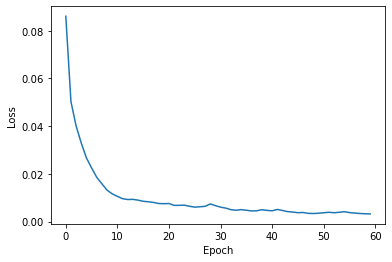

In [6]:
import matplotlib.pyplot as plt

exp = torch.load('experiment_3/darknet19_2.tar')
loss_history = exp["loss_history"]
plt.plot(range(len(loss_history)), loss_history) # trained for 60 epochs
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [7]:
# testing 
y_pred, y_true = test(test_loader, model_1, DEVICE, filter_params=[0.6, True])
# non-max-suppression
pred_boxes, true_boxes = get_boxes(y_pred, y_true, iou_threshold=0.5)

pred = {}
pred = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in pred_boxes:
    pred[box[0]].append(box[1:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

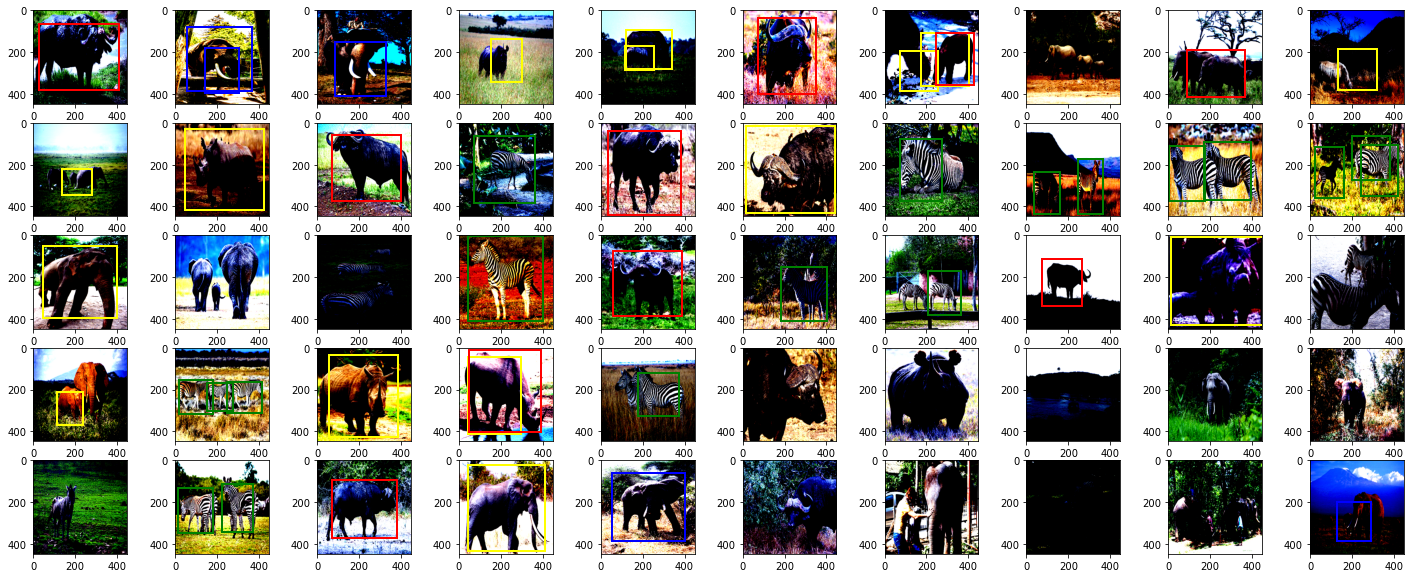

In [8]:
# plot predictions
fig, ax = plt.subplots(5, 10, figsize=(25, 10))
for idx in range(50):
    bbx = pred[idx]
    plot_bbox(idx, test_set, bbx, ax=ax.flatten()[idx])

In [9]:
# map
gt = {}
gt = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in true_boxes:
    gt[box[0]].append(box[1:])
    
predictions = convert_dict(pred)
target = convert_dict(gt, with_score=False)

th = torch.arange(0.5, 1, 0.05).tolist()
m_ap = MeanAveragePrecision(box_format='xywh', iou_type="bbox", iou_thresholds=th)
m_ap.update(predictions, target)
ap1 = m_ap.compute()

In [10]:
ap1

{'map': tensor(0.1213),
 'map_50': tensor(0.2505),
 'map_75': tensor(0.0971),
 'map_small': tensor(0.1213),
 'map_medium': tensor(-1.),
 'map_large': tensor(-1.),
 'mar_1': tensor(0.1293),
 'mar_10': tensor(0.1488),
 'mar_100': tensor(0.1488),
 'mar_small': tensor(0.1488),
 'mar_medium': tensor(-1.),
 'mar_large': tensor(-1.),
 'map_per_class': tensor(-1.),
 'mar_100_per_class': tensor(-1.)}

# 2. Darknet53

In [49]:
# load the data
transform = transforms.Compose([transforms.Resize((448, 448)), transforms.ToTensor(), transforms.Normalize([0.5200, 0.4957, 0.4068],[0.2391, 0.2283, 0.2303])])

train_set = AfricanWildlifeDataset2(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, transform=transform)
train_loader = DataLoader(dataset = train_set, batch_size = TRAIN_BATCH_SIZE, shuffle = True)

test_set = AfricanWildlifeDataset2(TRAIN_DIR, TEST_DIR, LABEL_DIR, S=S, B=B, C=C, istesting=True, transform=transform)
test_loader = DataLoader(dataset=test_set, batch_size=TEST_BATCH_SIZE, shuffle= False)

In [50]:
# model
model = YOLO(input_channels=3, S=S, B=B, C=C, arch="darknet53").to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = YoloLoss(S=S, B=B, C=C)

In [51]:
start_time = time.time()
loss_hist = train2(train_loader, model, optimizer, criterion, EPOCHS, DEVICE, 
                  ckpt_filename='experiment_3/darknet53.tar', load_model=True, 
                  save_epochs=5)
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 

-> Loading checkpoint
Elapsed time:  3.259254217147827


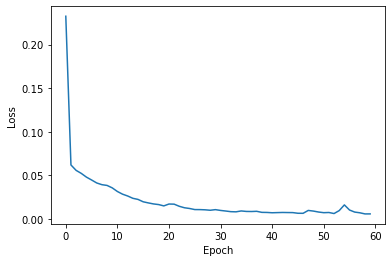

In [52]:
import matplotlib.pyplot as plt

exp = torch.load('experiment_3/darknet53.tar')
loss_history = exp["loss_history"]
plt.plot(range(len(loss_history)), loss_history) # trained for 60 epochs
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [53]:
# testing 
y_pred, y_true = test(test_loader, model, DEVICE, filter_params=[0.6, True])
# non-max-suppression
pred_boxes, true_boxes = get_boxes(y_pred, y_true, iou_threshold=0.5)

pred = {}
pred = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in pred_boxes:
    pred[box[0]].append(box[1:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

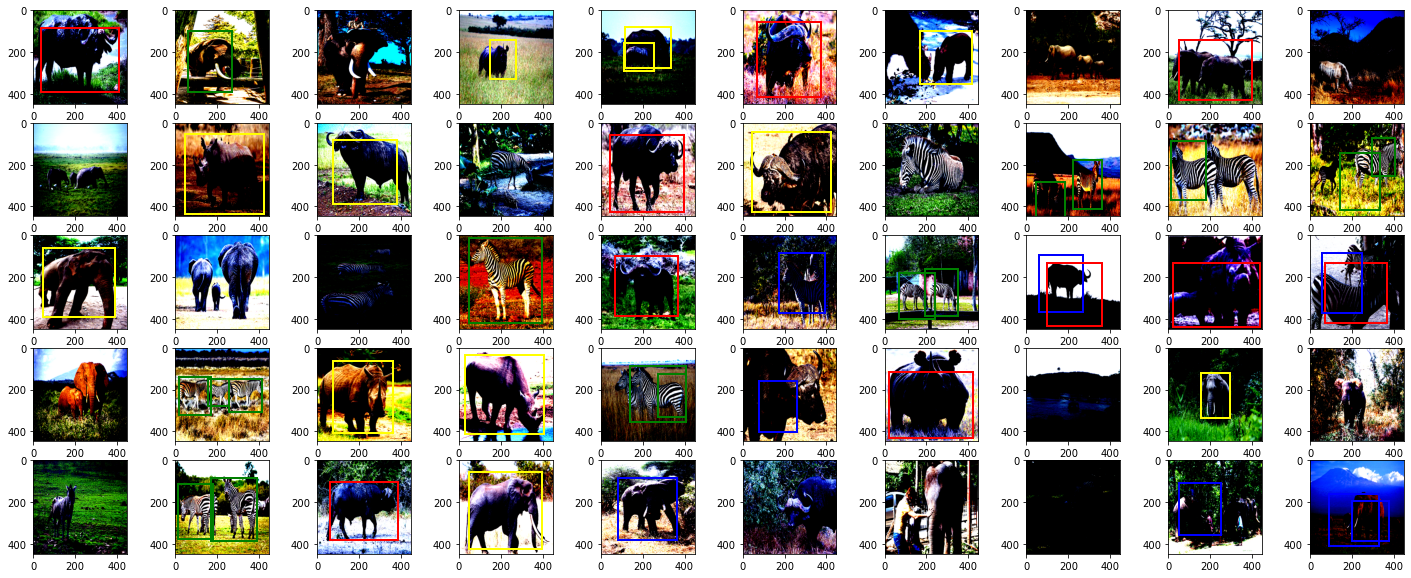

In [54]:
# plot predictions
fig, ax = plt.subplots(5, 10, figsize=(25, 10))
for idx in range(50):
    bbx = pred[idx]
    plot_bbox(idx, test_set, bbx, ax=ax.flatten()[idx])

In [55]:
# map
gt = {}
gt = {idx: [] for idx in range(len(test_loader) * TEST_BATCH_SIZE)}
for box in true_boxes:
    gt[box[0]].append(box[1:])
    
predictions = convert_dict(pred)
target = convert_dict(gt, with_score=False)

th = torch.arange(0.5, 1, 0.05).tolist()
m_ap = MeanAveragePrecision(box_format='xywh', iou_type="bbox", iou_thresholds=th)
m_ap.update(predictions, target)
ap2 = m_ap.compute()

In [56]:
ap2

{'map': tensor(0.0881),
 'map_50': tensor(0.2002),
 'map_75': tensor(0.0619),
 'map_small': tensor(0.0881),
 'map_medium': tensor(-1.),
 'map_large': tensor(-1.),
 'mar_1': tensor(0.1059),
 'mar_10': tensor(0.1205),
 'mar_100': tensor(0.1205),
 'mar_small': tensor(0.1205),
 'mar_medium': tensor(-1.),
 'mar_large': tensor(-1.),
 'map_per_class': tensor(-1.),
 'mar_100_per_class': tensor(-1.)}